In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("heart1.csv")

In [3]:
df.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,0,63,male,asymtomatic pain,145,233,True,normal,150,no,2.3,yes
1,1,37,male,non anginal pain,130,250,False,high,187,no,3.5,yes
2,2,41,female,atypical anginal pain,130,204,False,normal,172,no,1.4,yes
3,3,56,male,atypical anginal pain,120,236,False,high,178,no,0.8,yes
4,4,57,female,typical pain,120,354,False,high,163,yes,0.6,yes


In [4]:
df.dtypes

index         int64
age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalach       int64
exang        object
oldpeak     float64
target       object
dtype: object

In [5]:
df['fbs']=df.fbs.astype(int)

In [6]:
df.dtypes

index         int64
age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs           int32
restecg      object
thalach       int64
exang        object
oldpeak     float64
target       object
dtype: object

In [7]:
df.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,0,63,male,asymtomatic pain,145,233,1,normal,150,no,2.3,yes
1,1,37,male,non anginal pain,130,250,0,high,187,no,3.5,yes
2,2,41,female,atypical anginal pain,130,204,0,normal,172,no,1.4,yes
3,3,56,male,atypical anginal pain,120,236,0,high,178,no,0.8,yes
4,4,57,female,typical pain,120,354,0,high,163,yes,0.6,yes


In [8]:
replace_values = { "sex" : {"male":1,"female":0},
                   "cp": {"asymtomatic pain":3,"non anginal pain":2,"atypical anginal pain":1,"typical pain":0},
                  "restecg": {"normal":0,"high":1,"severe":2},
                  "exang":{"yes":1,"no":0},
                  "target":{"no":0,"yes":1}
    
}

In [9]:
df.replace(replace_values,inplace=True)

In [10]:
df.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,0,63,1,3,145,233,1,0,150,0,2.3,1
1,1,37,1,2,130,250,0,1,187,0,3.5,1
2,2,41,0,1,130,204,0,0,172,0,1.4,1
3,3,56,1,1,120,236,0,1,178,0,0.8,1
4,4,57,0,0,120,354,0,1,163,1,0.6,1


In [11]:
df.drop(['index'],axis=1,inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,1,0,150,0,2.3,1
1,37,1,2,130,250,0,1,187,0,3.5,1
2,41,0,1,130,204,0,0,172,0,1.4,1
3,56,1,1,120,236,0,1,178,0,0.8,1
4,57,0,0,120,354,0,1,163,1,0.6,1


In [12]:
mdf=pd.isnull(df)
mdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [13]:
missing_values_check=df.isnull().any()
missing_values_check

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
target      False
dtype: bool

In [14]:
x=df.drop('target',axis=1)
y=df['target']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=45)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
import matplotlib.pyplot as plt

In [20]:
k_range=range(1,23)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

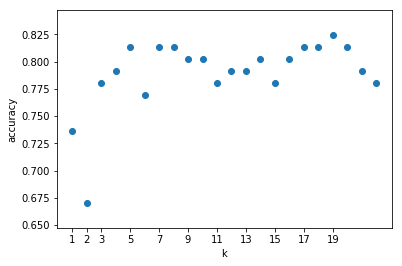

In [21]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([1,3,5,7,9,11,13,15,17,19,2])
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
pred=knn_model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[28,  9],
       [ 8, 46]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred)*100)

81.31868131868131


In [30]:
from sklearn.metrics import f1_score
print(f1_score(y_test,pred)*100)

84.11214953271028


In [31]:
from sklearn.metrics import jaccard_similarity_score
print( jaccard_similarity_score(y_test,pred)*100)

81.31868131868131
